In [1]:
import sys, os
sys.path.insert(1, '/home/ning_a/Desktop/CAPTCHA/base_solver/base_solver_char')
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
import torchvision.transforms as transforms
import captcha_setting
import my_dataset
from captcha_cnn_model import CNN, Generator
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
import copy
import operator
sys.path.insert(1, '/home/ning_a/Desktop/CAPTCHA/Solving_CAPTCHA_GAN_CNN/process_tool')
from processing_func import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn = CNN()
cnn.eval()
cnn.load_state_dict(torch.load('model_final_mix_2.pkl'))
cnn.to(device)

/home/ning_a/.local/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=

In [2]:
label = ''

dataloader = get_loader()

generator = Generator()
generator.load_state_dict(torch.load('/home/ning_a/Desktop/CAPTCHA/base_solver/base_solver_char/7800.pkl'))
generator.eval()
print("load GAN net.")

img_path = "/home/ning_a/Desktop/CAPTCHA/dark_web_captcha/yellow_data/"
# img = cv.imread(img_path+"33.png")

c_total = 0
c_correct = 0
label_target = ""
for i, (imgs, label) in enumerate(dataloader):
#     if(i<26):
#         continue
#     print(label)
    c_total+=1
    label_target = label
    imgs = torch.tensor(imgs).float()
    new_img = generator(imgs)
    new_img2 = new_img.data.cpu().numpy()
    imgs2 = imgs.data.cpu().numpy()
    imgs2 = imgs2[0][0]
    imgs2 = imgs2*255
    target_img = new_img2[0][0]
    target_img = target_img*255
    cv.imwrite( "temp.jpg",imgs2)
    cv.imwrite( "temp_2.jpg",target_img)
    imgs2 = cv.imread('temp.jpg')
    thresh = img_norm(imgs2)
    filter_containor = calculate_corner(thresh,255-thresh)
    pred_text = run_cnn_solver(filter_containor)
#     print(label[0][0:6], pred_text)
    if(label[0][0:6]==pred_text):
        c_correct += 1
print(float(c_correct)/float(c_total))

load GAN net.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/ning_a/Desktop/CAPTCHA/Solving_CAPTCHA_GAN_CNN/process_tool/processing_func.py:195: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, device=device).float()


0.0


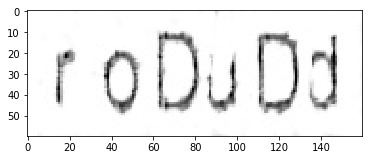

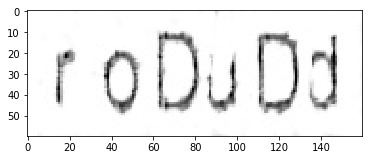

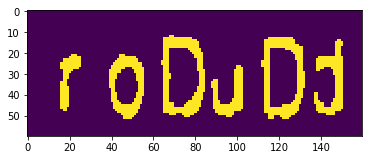

[16, 21, 10, 27]
[39, 21, 17, 31]
[64, 12, 21, 39]
[88, 26, 15, 25]
[112, 13, 21, 39]
[137, 14, 14, 36]


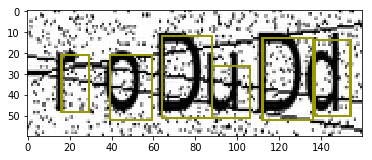

In [4]:
# print(type(target_img))




# for each_img in filter_containor:
#     print(each_img)
#     plt.imshow(each_img)
#     plt.show()

r
o
d
u
d
d
rodudd


/home/ning_a/Desktop/CAPTCHA/Solving_CAPTCHA_GAN_CNN/process_tool/processing_func.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, device=device).float()


'rodudd'

In [17]:
label_predicted

NameError: name 'label_predicted' is not defined

TypeError: Image data cannot be converted to float

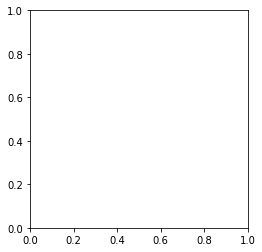

In [13]:
img = cv.imread('/home/ning_a/Desktop/CAPTCHA/Solving_CAPTCHA_GAN_CNN/seged_rescator/245.png')
#ret, thresh = cv.threshold(test_img,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
#ret, thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)
plt.imshow(img)
plt.show()

In [ ]:
#img = cv.imread(SAMPLE6_PATH)
# plt.imshow(img)
# plt.show()
n_img = np.zeros((img.shape[0],img.shape[1]))
img_aft = cv.normalize(img, n_img, 0,255,cv.NORM_MINMAX)
plt.imshow(img_aft)
plt.show()
gray = cv.cvtColor(img_aft,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
#ret, thresh = cv.threshold(gray,0,255,cv.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

In [ ]:
import copy
im2,contours,hierarchy = cv.findContours(thresh,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
filter_containor = []
temp_img = copy.deepcopy(img)
for i in range(0,len(contours)):  
    x, y, w, h = cv.boundingRect(contours[i])   
    newimage=img[y:y+h,x:x+w] # 先用y确定高，再用x确定宽
    nrootdir=("cut_image/")
    if h<5 and w<5:
        continue
    filter_containor.append([x, y, w, h])
    cv.rectangle(temp_img, (x,y), (x+w,y+h), (153,153,0), 1)
    if not os.path.isdir(nrootdir):
        os.makedirs(nrootdir)
    cv.imwrite( nrootdir+str(i)+".jpg",newimage) 
    print (x, y, w, h)
plt.imshow(temp_img)
plt.show()